# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rahmadea Putri
- **Email:** rahmadeaputri02@gmail.com
- **ID Dicoding:** rahmadeaputri

## Menentukan Pertanyaan Bisnis

- Jam berapa saja penggunaan sepeda paling tinggi di setiap musim dan kondisi cuaca?
- Bagaimana pengaruh cuaca dan suhu terhadap jumlah penyewaan sepeda? 
- Bagaimana pola penyewaan pengguna terdaftar dan pengguna kasual berbeda pada hari kerja, akhir pekan dan hari libur? 
- Faktor apa saja yang paling berpengaruh terhadap jumlah penyewaan sepeda? 
- Bagaimana pola perilaku pengguna sepeda (casual vs registered) berdasarkan waktu penyewaan, intensitas penggunaan, dan kontribusi total?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#LOAD DATA day.csv 
day_df = pd.read_csv("data/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# LOAD DATA hour.csv

hour_df = pd.read_csv("data/Bike-sharing-dataset/hour.csv") 
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset "day.csv" memiliki 731 baris dan 16 klolom
- Dataset "hour.csv" memiliki 17379 baris dan 17 klolom
- Dataset day berisi penggunaan sepeda per-hari
- Dataset hour berisi penggunaan sepeda per-jam
- Dataset ini terdiri dari beberapa fields dengan penjelasan sebagai berikut : 
    1. instant -> indeks atau nomor urut untuk setiap catatan dalam dataset 
    2. dteday -> tanggal penyewaan sepeda dg format (yyyy-mm-dd)
    3. season -> musim penyewaan (1: semi, 2: panas, 3: gugur, 4: dingin)
    4. yr -> tahun penyewaan (0: 2011, 1:2012)
    5. mnth -> bulan penyewaan (1-12)
    6. holiday -> menunjukkan hari libur/tidak (1: libur, 0: Bukan hari libur)
    7. weekday -> hari dalam seminggu (0: minggu, 1: senin, dst )
    8. workingday -> hari kerja/tidak (0: bukan hari kerja, 1: hari kerja)
    9. weathershit -> kode kondisi cuaca (1: cerah, 2: berawan + kabut, 3: hujan/rintik, 4:hujan berat + salju)
    10. temp -> suhu dalam celcius (skala 0-1)
    11. atempt -> suhu terasa dalam celcius (0-1)
    12. hum -> kelembapan (skala 0-1)
    13. windspeed -> kecepatan angin (skala 0-1)
    14. casual -> jumlah pengguna kasual yang menyewa sepeda 
    15. registered -> jumlah pengguna terdaftar yang menyewa sepeda
    16. cnt -> total jumlah penyewa sepeda(casual + registered)
    17. hr -> jam penyewaan (0-23) **hanya tersedia di hour.csv

### Assessing Data

#### Dataset Day

In [4]:
# informasi data

day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
#Duplikasi data 

print("Jumlah duplikasi day_df :", day_df.duplicated().sum())

Jumlah duplikasi day_df : 0


In [6]:
#Statistik 

day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
#Missing Value

day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Dataset Hour

In [8]:
#informasi dataset hour

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
#Duplikasi data 

print("Jumlah duplikasi hour_df :", hour_df.duplicated().sum())

Jumlah duplikasi hour_df : 0


In [10]:
#Missing Value

hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
#statistik 

hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Insight :
- Tidak ada missing value atau data yang terduplikasi antara dataset day dan hour. 
- Tipe data kolom "dteday" seharusnya adalah datetime.

### Cleaning Data

#### Mengubah Tipe Data

In [12]:
 #day dataset
 
 datetime_column = ["dteday"]
 
 for column in datetime_column :
     day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
#hour dataset
 
datetime_column = ["dteday"]
 
for column in datetime_column :
     hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

<Axes: ylabel='casual'>

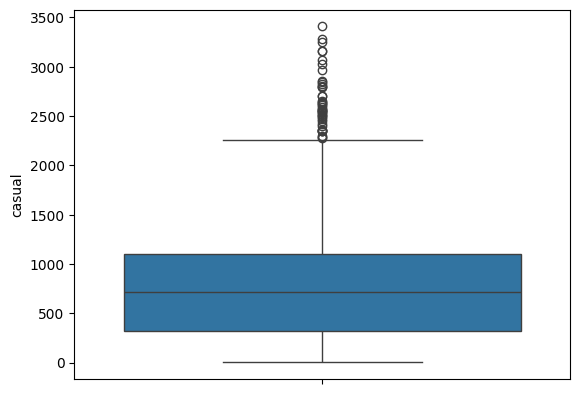

In [29]:
#Dataset Day

sns.boxplot(data=day_df, y='casual')

<Axes: ylabel='registered'>

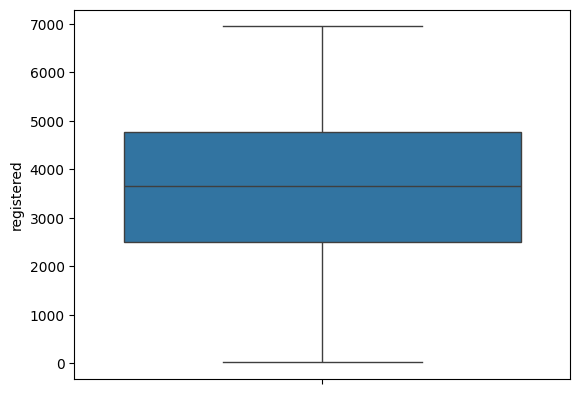

In [30]:
#Dataset Day

sns.boxplot(data=day_df, y='registered')

<Axes: ylabel='casual'>

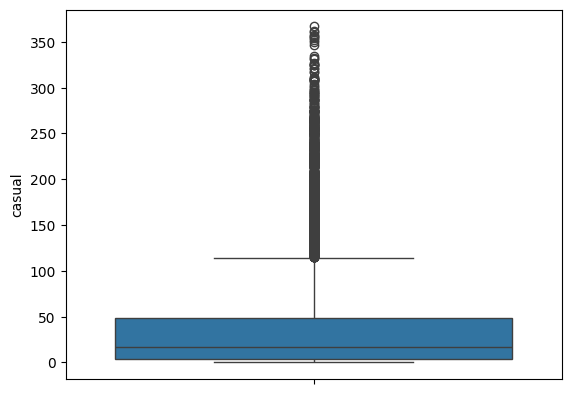

In [31]:
#Dataset Hour

sns.boxplot(data=hour_df, y='casual')

<Axes: ylabel='registered'>

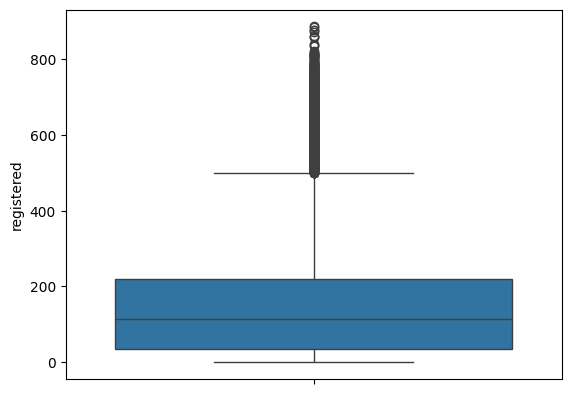

In [32]:
#Dataset Hour

sns.boxplot(data=hour_df, y='registered')

**Insight :**
- Boxplot menunjukkan banyaknya data diluar garis. Hal ini perlu di explore lebih lanjut apakah data penting atau tidak. Beberapa nilai tinggi bisa saja mencerminkan kejadian spesifik(misalnya, penyewaan sepeda melonjak pada hari-hari tertentu)
- Registered pada dataset day tidak memiliki outlier

In [58]:
# Membuat kombinasi semua tanggal dan jam (731 hari x 24 jam)
all_hours = pd.MultiIndex.from_product([hour_df['dteday'].unique(), range(24)], names=['dteday', 'hr'])

# Gabungkan dengan dataset hour_df
existing_hours = hour_df.set_index(['dteday', 'hr']).index

# Cari jam yang hilang (jam yang ada di all_hours tetapi tidak ada di existing_hours)
missing_hours = all_hours.difference(existing_hours)

# Tampilkan jam yang hilang
print(missing_hours)

MultiIndex([('2011-01-02',  5),
            ('2011-01-03',  2),
            ('2011-01-03',  3),
            ('2011-01-04',  3),
            ('2011-01-05',  3),
            ('2011-01-06',  3),
            ('2011-01-07',  3),
            ('2011-01-11',  3),
            ('2011-01-11',  4),
            ('2011-01-12',  3),
            ...
            ('2012-10-30',  7),
            ('2012-10-30',  8),
            ('2012-10-30',  9),
            ('2012-10-30', 10),
            ('2012-10-30', 11),
            ('2012-10-30', 12),
            ('2012-11-08',  3),
            ('2012-11-29',  3),
            ('2012-12-24',  4),
            ('2012-12-25',  3)],
           names=['dteday', 'hr'], length=165)


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore Dataset Day

##### Bagaimana pola penyewaan pengguna terdaftar dan pengguna kasual berbeda pada hari kerja, akhir pekan, dan hari libur?

In [61]:
# Identifikasi hari kerja, akhir pekan dan hari libur

# Menambahkan kolom kategori berdasarkan weekday dan holiday
day_df['day_type'] = day_df.apply(lambda row: 'Weekend' if row['weekday'] in [0, 6] 
                                   else ('Holiday' if row['holiday'] == 1 else 'Weekday'), axis=1)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_type
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Weekend
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Weekend
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Weekday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Weekday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Weekday


In [64]:
# Analisis penyewaan pada masing-masing kategori

# Menghitung rata-rata penyewaan berdasarkan kategori hari (day_type) dan jenis pengguna
average_rentals_by_daytype = day_df.groupby(['day_type'])[['casual', 'registered']].mean()
print(average_rentals_by_daytype)

               casual   registered
day_type                          
Holiday   1064.714286  2670.285714
Weekday    606.570000  3978.250000
Weekend   1401.776190  2987.909524


**Insight :**
1. Casual User  
    - Weekday : Penyewaan oleh casual user lebih rendah pada hari kerja yaitu sekitar 607 sepeda. 
    - Weekend : Penyewaan pada akhir pekan sekitar 1402 sepeda.
    - Holiday : Rata-rata penyewaan sepeda oleh casual user paling tinggi pada hari libur yaitu sekitar 1065 sepeda. 
2. Registered User
    - Weekday : Penyewaan oleh registered user lebih tinggi pada hari kerja yaitu sekitar 3978 sepeda. 
    - Weekend : Penyewaan pada akhir pekan sekitar 2988 sepeda sedikit lebih rendah dibandingkan pada hari kerja. 
    - Holiday : Rata-rata penyewaan sepeda oleh registered user cukup tinggi pada hari libur yaitu sekitar 2670 sepeda lebih rendah dibandingkan dengan hari kerja. 
3. Perbandingan antara casual dan registered user
    - Casual user cendrung lebih banyak menyewa sepeda pada hari libur dan akhir pekan.
    - Registered user lebih banyak menyewa sepeda pada hari kerja.
    - Pada akhir pekan, sedikit penurunan penyewaan oleh registered user namun masih cukup tinggi, sedangkan casual user cendrung lebih tinggi pada akhir pekan dibanding hari kerja. 

##### Faktor apa saja yang paling berpengaruh terhadap jumlah penyewaan sepeda? 

In [112]:
# Analisis Korelasi 

#memilih hanya kolom numerik
numerical_df = day_df.select_dtypes(include=['int64','float64'])

#menghitung korelasi antar kolom numerik
correlation_matrix = numerical_df.corr()
correlation_matrix['cnt']

instant       0.628830
season        0.406100
yr            0.566710
mnth          0.279977
holiday      -0.068348
weekday       0.067443
workingday    0.061156
weathersit   -0.297391
temp          0.627494
atemp         0.631066
hum          -0.100659
windspeed    -0.234545
casual        0.672804
registered    0.945517
cnt           1.000000
Name: cnt, dtype: float64

In [ ]:
#Analisis Kategorikal berdasarkan cuaca

avg_rentals_by_weather = day_df.groupby('weathersit')['cnt'].mean()
avg_rentals_by_weather

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

In [ ]:
#Analisis Kategorikal berdasarkan musim

avg_rentals_by_season = day_df.groupby('season')['cnt'].mean()
avg_rentals_by_season

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

In [ ]:
#Analisis Kategorikal berdasarkan hari libur

avg_retals_by_holiday = day_df.groupby('holiday')['cnt'].mean()
avg_retals_by_holiday

holiday
0    4527.104225
1    3735.000000
Name: cnt, dtype: float64

In [89]:
#Analisis Kategorikal berdasarkan hari

avg_retals_by_weekday = day_df.groupby('weekday')['cnt'].mean()
avg_retals_by_weekday

weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64

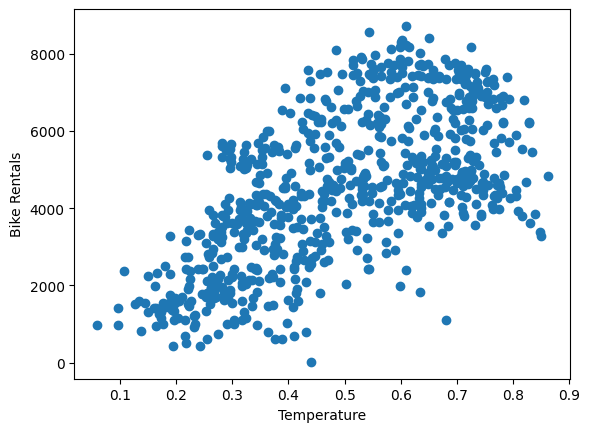

In [82]:
# Hubungan variabel suhu dan jumlah penyewa sepeda

plt.scatter(day_df['temp'], day_df['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bike Rentals')
plt.show()

**Ingsight :**
1. Korelasi antar variabel dengan jumlah penyewaan sepeda : 
    -  Variabel dengan korelasi positif kuat dengan jumlah penyewa adalah atemp (0,63) dan temp (0,62), menunjukkan bahwa suhu berhubungan positif dengan jumlah penyewaan sepeda, semakin hangat cuaca semakin banyak penyewaan sepeda.
    - Variabel dengan korelasi positif lemah yaitu :
        - season(0,406) menunujukkan musim tertentu mempengaruhi penyewaan sepeda.
        - weekday (0,067) dan workingday (0,061) korelasi lemah menunjukan bahwa hari kerja atau akhir pekan tidak secara signifikan mempengaruhi penyewaan. 
    - Variabel dengan korelasi negatif
        - weathersit(-0,29), menunjukan cuaca yg lebih buruk berhubungan dengan penurunan penyewaan sepeda.
        - windspeed (-0,23), menunjukkan angin kencang mempengaruhi penurunan penyewaan sepeda. 
        - hum (-0,10), kelembapan menunjukkan korelasi negatif lemah, yang berarti kelembapan tinggi mungkin sedikit menurunkan penyewaan, tetapi dampaknya tidak signifikan. 
    - Variabel yang tidak memiliki dampak signifikan pada penyewaan 
        -holiday (-0,06), korelasi sangat rendah menunjukan bahwa hari libur tidak memiliki dampak signifikan pada penyewaan. 
2. Analisis Kategorikal
    - Kondisi cuaca sangat mempengaruhu keputusan pengguna untuk menyewa sepeda. cuaca cerah mendorong lebih banyak penyewaan, sedangkan kondisi salju mengurangi penggunaan.
    - Suhu hangat dan kondisi yang lebih nyaman di musim panas dan gugur meningkatkan penyewaan sepeda, sebaliknya suhu dingin di musim dingin mengurangi aktivitas luar ruangan. 
    - Penyewaan cendrung lebih tinggi pada hari biasa dibanding hari libur
    - Hari-hari kerja, terutama mendekati weekend (kamis dan jumat), cendrung memiliki lebih banyak penyewaan. sabtu dan minggu ada di posisi kedua dan hari senin lebih rendah dibandingkan hari lainnya. 
3. Grafik scatterplot hubungan antara suhu dan jumlah penyewa sepeda
    - Saat suhu meningkat, jumlah penyewaan sepeda cendrung meningkat (positif)
    - Korelasi tidak linear sepenuhnya, menyebar lebih luas pada suhu yang tinggi. Hal ini mengindikasikan bahwa faktor lain ikut mempengaruhi penyewaan sepeda. 
    - Pada suhu yang terlalu rendah atau sangat tinggi, jumlah penyewa sepeda tampaknya lebih rendah. Menunjukan pengguna lebih suka menyewa sepeda pada suhu yang nyaman (tidak terlalu rendah dan tidak terlalu tinggi)



### Explore Dataset Hour

##### Bagaimana Pengaruh cuaca dan suhu terhadap jumlah penyewaan sepeda?

In [44]:
#Ekplorasi distribusi variabel cuaca dan suhu

#statistik deskriptif untuk variabel yang relevan
hour_df[['temp','atemp','weathersit','cnt']].describe()

,temp,atemp,weathersit,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,1.425283,189.463088
std,0.192556,0.171850,0.639357,181.387599
min,0.020000,0.000000,1.000000,1.000000
25%,0.340000,0.333300,1.000000,40.000000
50%,0.500000,0.484800,1.000000,142.000000
75%,0.660000,0.621200,2.000000,281.000000
max,1.000000,1.000000,4.000000,977.000000


In [45]:
#Korelasi Awal Antar Variabel

# Korelasi antara variabel suhu, cuaca, dan jumlah penyewaan
corr_matrix = hour_df[['temp', 'atemp', 'weathersit', 'cnt']].corr()
print(corr_matrix)


                temp     atemp  weathersit       cnt
temp        1.000000  0.987672   -0.102640  0.404772
atemp       0.987672  1.000000   -0.105563  0.400929
weathersit -0.102640 -0.105563    1.000000 -0.142426
cnt         0.404772  0.400929   -0.142426  1.000000


In [48]:
#Rata-rata penyewaan berdasarkan cuaca

#hitung rata2 penyewaan untuk setiap kondisi cuaca
weather_mean = hour_df.groupby('weathersit')['cnt'].mean()
print(weather_mean)

#label
weather_labels = {
    1: 'Clear or Partly Cloudy',
    2: 'Mist or Cloudy',
    3: 'Light Rain or Snow',
    4: 'Heavy Rain or Ice Pallets'
}
weather_mean.index = weather_mean.index.map(weather_labels)
print(weather_mean)

weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64
weathersit
Clear or Partly Cloudy       204.869272
Mist or Cloudy               175.165493
Light Rain or Snow           111.579281
Heavy Rain or Ice Pallets     74.333333
Name: cnt, dtype: float64


In [49]:
#Rata-rata penyewaaan berdasarkan kelompok suhu

# Membuat kategori suhu (misalnya: dingin, sedang, panas)
bins = [0, 0.3, 0.6, 1.0]  # Rentang berdasarkan skala normalisasi suhu (0-1)
labels = ['Cold', 'Moderate', 'Hot']
hour_df['temp_category'] = pd.cut(hour_df['temp'], bins=bins, labels=labels)

# Hitung rata-rata penyewaan berdasarkan kategori suhu
temp_mean = hour_df.groupby('temp_category')['cnt'].mean()
print(temp_mean)

temp_category
Cold         84.378486
Moderate    177.897758
Hot         268.663925
Name: cnt, dtype: float64


C:\Users\H P\AppData\Local\Temp\ipykernel_45548\3609377645.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_mean = hour_df.groupby('temp_category')['cnt'].mean()


In [50]:
#Interaksi antara cuaca dan suhu

# Grup data berdasarkan kategori suhu dan kondisi cuaca
interaction = hour_df.groupby(['temp_category', 'weathersit'])['cnt'].mean().unstack()
print(interaction)

# Opsional: Tambahkan label deskriptif untuk interpretasi
interaction.columns = interaction.columns.map(weather_labels)
print(interaction)

weathersit              1           2           3          4
temp_category                                               
Cold            85.332004   92.555212   49.258741  74.333333
Moderate       194.651310  170.056799  100.523114        NaN
Hot            279.659958  248.644285  198.112540        NaN
weathersit     Clear or Partly Cloudy  Mist or Cloudy  Light Rain or Snow  \
temp_category                                                               
Cold                        85.332004       92.555212           49.258741   
Moderate                   194.651310      170.056799          100.523114   
Hot                        279.659958      248.644285          198.112540   

weathersit     Heavy Rain or Ice Pallets  
temp_category                             
Cold                           74.333333  
Moderate                             NaN  
Hot                                  NaN  


C:\Users\H P\AppData\Local\Temp\ipykernel_45548\1091846052.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction = hour_df.groupby(['temp_category', 'weathersit'])['cnt'].mean().unstack()


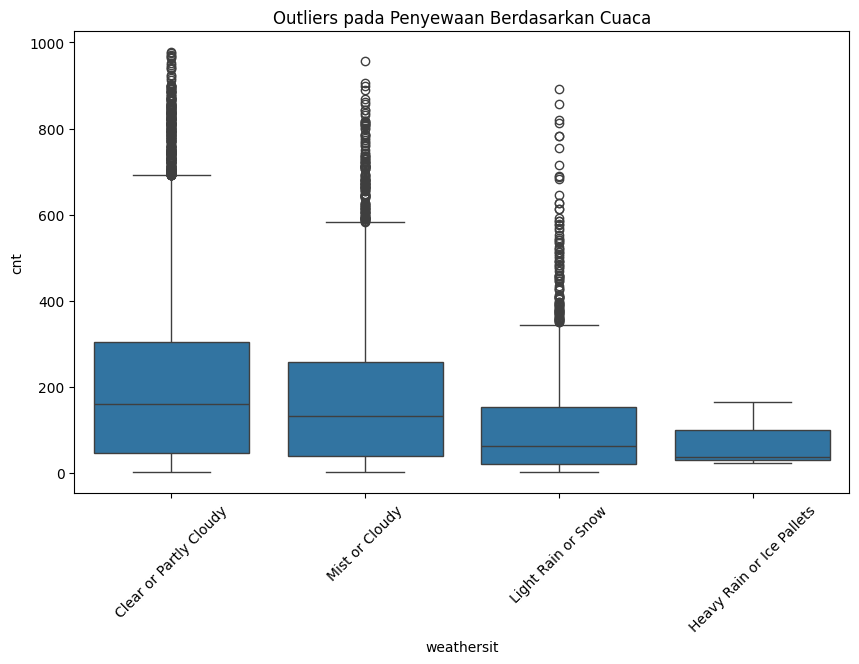

In [51]:
#Analisis Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=hour_df, x='weathersit', y='cnt')
plt.xticks(ticks=range(4), labels=weather_labels.values(), rotation=45)
plt.title('Outliers pada Penyewaan Berdasarkan Cuaca')
plt.show()

In [58]:
#Analisis Waktu 

# Grup data berdasarkan jam dan kondisi cuaca
hourly_weather = hour_df.groupby(['hr', 'weathersit'])['cnt'].mean().unstack()
hourly_weather

weathersit,1,2,3,4
hr,,,,
0,59.161554,47.232432,28.115385,NaN
1,34.395918,35.541899,17.129630,23.0
2,22.817992,25.491713,14.839286,NaN
3,11.995604,12.452128,6.944444,NaN
4,6.413567,6.721311,4.684211,NaN
5,20.414687,20.141463,13.877551,NaN
6,79.165563,74.612903,55.981818,NaN
7,218.742664,224.733645,131.071429,NaN
8,361.359091,391.283843,213.775862,NaN


**Insight :**
1. Korelasi antar variabel
    - Suhu (temp dan atemp) memiliki pengaruh yang lebih besar terhadap jumlah penyewaan sepeda dibandingkan dengan kondisi cuaca (weathershit).
    - Korelasi positif antara suhu dan penyewaan sepeda menunjukkan bahwa penyewaan sepeda lebih banyak terjadi pada suhu yang tinggi, meskipun pengaruhnya tidak terlalu besar (suhu bukan satu2nya faktor mempengaruhi penyewaan sepeda).
2. Rata-rata penyewaan berdasarkan kondisi cuaca
    - Cuaca cerah meningkatkan jumlah penyewaan sepeda.
    - Cuaca mendung atau berkabut masih mendukung penyewaan sepeda.
    - Hujan dan kondisi cuaca buruk mengurangi penyewaan sepeda secara drastis.
3. Rata-rata penyewaan berdasarkan kategori suhu 
    - Suhu dingin memiliki rata-rata penyewaan terendah yaitu sekitar 84 penyewaan.
    - Suhu sedang meningkatkan rata-rata penyewaan yaitu sekitar 178 penyewaan.
    - Suhu panas merupakan penyewaan dengan rata-rata tertinggi yaitu sekitar 269 penyewaan.
4. Interaksi antara suhu dan cuaca
    - Pada suhu dingin, 
        - cuaca mendung atau berawan memiliki penyewaan dengan rata-rata tertinggi yaitu sekitar 93 penyewaan.
        - cuaca cerah dan sedikit berawan memiliki penyewaan sepeda dengan rata-rata sekitar 85 penyewaan. 
        - cuaca hujan ringan atau saljju memiliki rata-rata sekitar 42 penyewaan.
        - cuaca hujan lebat atau es adalah rata-rata yang terendah sekitar 74 penyewaan. 
    - Pada suhu sedang 
        - cuaca cerah atau sedikit berawan memiliki penyewaan sepeda dengan rata-rata tertinggi sekitar 195 penyewaan. 
        - cuaca mendung atau berawan memiliki rata-rata penyewaan sekitar 170 penyewaan. 
        - cuaca hujan ringan atau salju membuat rata-rata penyewaan sepeda lebih rendah yaitu sekitar 101 penyewaan. 
    - Pada suhu panas 
        - cuaca cerah dan sedikit berawan memiliki penyewaan sepeda dengan rata-rata tertinggi yaitu sekitar 280 penyewaan.
        - cuaca mendung atau berawan memiliki rata-rata penyewaaan sekitar 249 penyewaan. 
        - cuaca hujan ringan atau salju memiliki rata-rata terendah yaitu 198 penyewaan. 
5. Analisis outliers pada penyewaan berdasarkan cuaca
    - Terdapat variasi yang cukup tinggi pada jumlah penyewaan untuk semua kondisi cuaca. ini menunjukkan bahwa faktor selain cuaca juga sangat mempengaruhi jumlah penyewaan. 
    - Ada banyak outlier, artinya ada beberapa jam dengan jumlah penyewaan yang jauh di atas rata-rata. 
6. Analisis waktu berdasarkan cuaca
    - Penyewaan sepeda tertinggi sekitar jam 8-9 pagi terutama dengan cuaca cerah dan sedikit berawan. 
    - Penyewaan relatif tinggi antara jam 7 - 12 dan menurun setelahnya. 


##### Bagaimana pola perilaku pengguna sepeda (casual vs registered) berdasarkan waktu penyewaan, intensitas penggunaan, dan kontribusi total?

###### Registerd

In [48]:
#Recency

# Tetapkan tanggal analisis (tanggal terakhir dalam data)
analysis_date = hour_df['dteday'].max()

# Hitung Recency: waktu terakhir penyewaan untuk masing-masing kelompok pengguna
recency_registered = hour_df.groupby('registered')['dteday'].max().reset_index()
recency_registered['recency'] = (analysis_date - recency_registered['dteday']).dt.days

In [49]:
#Frequency

# Hitung Frequency: total sesi penyewaan per kelompok pengguna
frequency_registered = hour_df.groupby('registered').size().reset_index(name='frequency')

In [50]:
#Monetary 

# Hitung Monetary: total jumlah penyewaan (cnt) per kelompok pengguna
monetary_registered = hour_df.groupby('registered')['cnt'].sum().reset_index()
monetary_registered.columns = ['registered', 'monetary']

In [51]:
# Gabungkan data RFM
rfm_registered = recency_registered.merge(frequency_registered, on='registered').merge(monetary_registered, on='registered')

# Tampilkan data RFM
print(rfm_registered)

     registered     dteday  recency  frequency  monetary
0             0 2012-11-23       38         24        35
1             1 2012-12-31        0        201       294
2             2 2012-12-30        1        245       648
3             3 2012-12-31        0        294      1154
4             4 2012-12-28        3        307      1602
..          ...        ...      ...        ...       ...
771         860 2012-09-25       97          1       967
772         871 2012-10-23       69          1       938
773         876 2012-10-24       68          2      1916
774         885 2012-09-20      102          1       976
775         886 2012-09-12      110          1       977

[776 rows x 5 columns]


In [52]:
# Fungsi pemberian skor
def rfm_score(x, quantiles, metric):
    if metric == 'recency':
        if x <= quantiles[0.25]: return 5
        elif x <= quantiles[0.50]: return 4
        elif x <= quantiles[0.75]: return 3
        else: return 2
    else:  # Untuk frequency dan monetary
        if x <= quantiles[0.25]: return 2
        elif x <= quantiles[0.50]: return 3
        elif x <= quantiles[0.75]: return 4
        else: return 5

# Hitung kuantil untuk R, F, dan M
quantiles_registered = rfm_registered[['recency', 'frequency', 'monetary']].quantile([0.25, 0.5, 0.75]).to_dict()

# Terapkan skor
rfm_registered['recency_score'] = rfm_registered['recency'].apply(rfm_score, args=(quantiles['recency'], 'recency'))
rfm_registered['frequency_score'] = rfm_registered['frequency'].apply(rfm_score, args=(quantiles['frequency'], 'frequency'))
rfm_registered['monetary_score'] = rfm_registered['monetary'].apply(rfm_score, args=(quantiles['monetary'], 'monetary'))

# Total skor RFM
rfm_registered['RFM_score'] = rfm_registered['recency_score'] + rfm_registered['frequency_score'] + rfm_registered['monetary_score']

In [53]:
# Fungsi segmentasi
def categorize_rfm(score):
    if score >= 13: return 'High-Value Users'
    elif score >= 10: return 'Medium-Value Users'
    else: return 'Low-Value Users'

rfm_registered['user_segment'] = rfm_registered['RFM_score'].apply(categorize_rfm)

# Tampilkan segmentasi
print(rfm_registered.groupby('user_segment').size())

user_segment
High-Value Users      535
Low-Value Users       131
Medium-Value Users    110
dtype: int64


###### Casual

In [54]:
#Recency 

# Recency untuk casual
recency_casual = hour_df.groupby('casual')['dteday'].max().reset_index()
recency_casual['recency'] = (analysis_date - recency_casual['dteday']).dt.days

In [55]:
# Frequency untuk casual
frequency_casual = hour_df.groupby('casual').size().reset_index(name='frequency')

In [56]:
# Monetary untuk casual
monetary_casual = hour_df.groupby('casual')['cnt'].sum().reset_index()
monetary_casual.columns = ['casual', 'monetary']

In [57]:
# Gabungkan RFM untuk casual
rfm_casual = recency_casual.merge(frequency_casual, on='casual').merge(monetary_casual, on='casual')
print(rfm_casual)

     casual     dteday  recency  frequency  monetary
0         0 2012-12-31        0       1581     20920
1         1 2012-12-30        1       1082     27181
2         2 2012-12-31        0        798     29764
3         3 2012-12-31        0        697     38656
4         4 2012-12-31        0        561     37314
..      ...        ...      ...        ...       ...
317     356 2012-05-19      226          1       672
318     357 2012-03-17      289          1       679
319     361 2012-05-19      226          1       730
320     362 2012-10-06       86          1       743
321     367 2012-03-17      289          1       685

[322 rows x 5 columns]


In [58]:
# Tambahkan skor untuk casual

rfm_casual['recency_score'] = rfm_casual['recency'].apply(rfm_score, args=(quantiles['recency'], 'recency'))
rfm_casual['frequency_score'] = rfm_casual['frequency'].apply(rfm_score, args=(quantiles['frequency'], 'frequency'))
rfm_casual['monetary_score'] = rfm_casual['monetary'].apply(rfm_score, args=(quantiles['monetary'], 'monetary'))

In [59]:
# Total skor RFM casual
rfm_casual['RFM_score'] = rfm_casual['recency_score'] + rfm_casual['frequency_score'] + rfm_casual['monetary_score']

In [60]:
# Kategorisasi untuk casual
rfm_casual['user_segment'] = rfm_casual['RFM_score'].apply(categorize_rfm)
print(rfm_casual.groupby('user_segment').size())

user_segment
High-Value Users      235
Low-Value Users        65
Medium-Value Users     22
dtype: int64


##### Insight :
1. Pola perilaku pengguna Registered
    - Sebagian besar pengguna registered adalah high-value users (535), artinya mereka sering menyewa sepeda baru-baru ini aktif, dan memberikan kontribusi signifikan terhadap penyewaan. 
    - Medium value user (110) adalah pengguna dengan frekuensi penyewaan yang sedang dan kontribusi yg tidak terlalu besar. 
    - Low value user (131) adalah kelompok yang jarang aktif atau kontrivbusinya kecil terhadap total penyewaan. 
2. Pola perilaku pengguna casual
    - High value user casual jauh lebih sediki dibanding registered yaitu 235, namun mereka memiliki kontribusi monetary yang sangat besar.
    - Medium value user (22) jumlah sangat keci, menunjukkan adanya potensi untuk mendorong mereka menjadi high user. 
    - Low value user (65) adalah mayoritas dari pengguna casual yang tidak memberikan kontribusi besar.

##### Jam berapa saja penggunaan sepeda paling tinggi di setiap musim dan kondisi cuaca?

In [74]:
#Agregasi Data

grouped_data = hour_df.groupby(['season', 'weathersit', 'hr'])['cnt'].mean().reset_index()
grouped_data


,season,weathersit,hr,cnt
0,1,1,0,28.885714
1,1,1,1,18.120370
2,1,1,2,11.625000
3,1,1,3,7.297872
4,1,1,4,3.226804
...,...,...,...,...
286,4,3,19,196.375000
287,4,3,20,149.684211
288,4,3,21,114.461538
289,4,3,22,73.687500


In [70]:
#Identifikasi jam tertinggi 

peak_hours = grouped_data.loc[grouped_data.groupby(['season', 'weathersit'])['cnt'].idxmax()]
peak_hours 

,season,weathersit,hr,cnt
17,1,1,17,293.411290
32,1,2,8,243.591837
66,1,3,18,157.666667
74,1,4,18,164.000000
92,2,1,17,570.250000
116,2,2,17,463.918919
141,2,3,18,309.894737
164,3,1,17,600.042254
188,3,2,17,563.666667
213,3,3,18,393.500000


**Insight :**
- Peak hours penyewaan sepeda berdasarkan musim dan cuaca : 
    1. Musim spring 
        - Cuaca cerah : Paling tinggi terjadi pada jam 17 dengan rata2 293 penyewaan
        - Cuaca mendung : Paling tinggi terjadi pada jam 8 pagi dengan rata-rata 243 penyewaan.
    2. Musim summer (panas)
        - Cuaca cerah : Paling tinggi terjadi pada jam 17 dg rata2 463 penyewaan. 
        - Cuaca mendung : Paling tinggi terjadi pada jam 17 dg rata2 463 penyewaan.
    3. Musim fall (gugur)
        - Cuaca cerah : Penyewaan tertinggi terjadi pada jam 17 dengan rata2 563 penyewaan. 
        - Cuaca mendung : Penyewaan teringgi terjadi pada jam 17 dg rata2 563 penyewaan.
    4. Musim winter (dingin)
        - Cuaca cerah :  Penyewaan tertinggi terjadi pada jam 17, dengan 523 penyewaan.
        - Cuaca Mendung : Penyewaan tertinggi terjadi pada jam 17, dengan 479 penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Jam berapa saja penggunaan sepeda paling tinggi di setiap musim dan kondisi cuaca?

In [76]:
# Hitung rata-rata penyewaan sepeda berdasarkan jam (hr), musim (season), dan cuaca (weathersit)
avg_rentals_1 = hour_df.groupby(['season', 'weathersit', 'hr'])['cnt'].mean().reset_index()

In [79]:
# Pivot data agar musim dan cuaca menjadi index, jam menjadi kolom, dan nilai rata-rata penyewaan menjadi nilai dalam matriks
heatmap_data = avg_rentals_1.pivot_table(index=['season', 'weathersit'], columns='hr', values='cnt', aggfunc='mean')

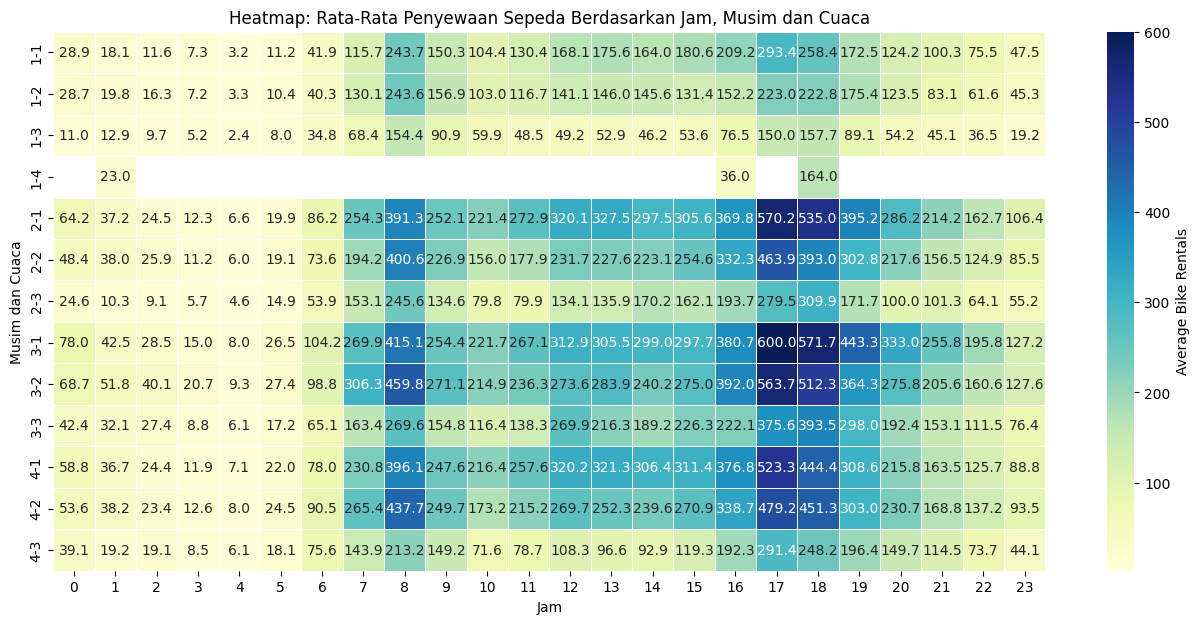

In [83]:
# Menampilkan heatmap
plt.figure(figsize=(16, 7))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='.1f', cbar_kws={'label': 'Average Bike Rentals'}, linewidths=0.5)
plt.title("Heatmap: Rata-Rata Penyewaan Sepeda Berdasarkan Jam, Musim dan Cuaca")
plt.xlabel("Jam")
plt.ylabel("Musim dan Cuaca")
plt.show()

**Insight :**
- Jam 17:00 adalah puncak penyewaan sepeda di semua musim dan kondisi cuaca cerah maupun mendung. Secara keseluruhan penyewaan sepeda tinggi terjadi pada pagi hari (07:00 - 09:00) dan sore hari (16:00 - 18:00). Ini mencerminkan pola commuting (pengguna sepeda untuk perjalanan kerja atau sekolah)
- Musim gugur memiliki rata-rata jumlah penyewaan tertinggi, terutama pada jam-jam sibuk (07:00 - 09:00 dan 16:00 - 18:00).
- Cuaca buruk (hujan ringan maupun salju) menurunkan jumlah penyewaan disemua musim, terutama di musim dingin. 

### Pertanyaan 2: Bagaimana pengaruh cuaca dan suhu terhadap jumlah penyewaan sepeda?

In [88]:
# Membuat mapping dari angka ke nama kondisi cuaca
weather_mapping = {
    1: "Cerah",
    2: "Berawan",
    3: "Hujan Ringan",
    4: "Hujan Lebat"
}

# Mengganti angka di kolom 'weathersit' dengan nama cuaca
hour_df['weathersit_condition'] = hour_df['weathersit'].map(weather_mapping)

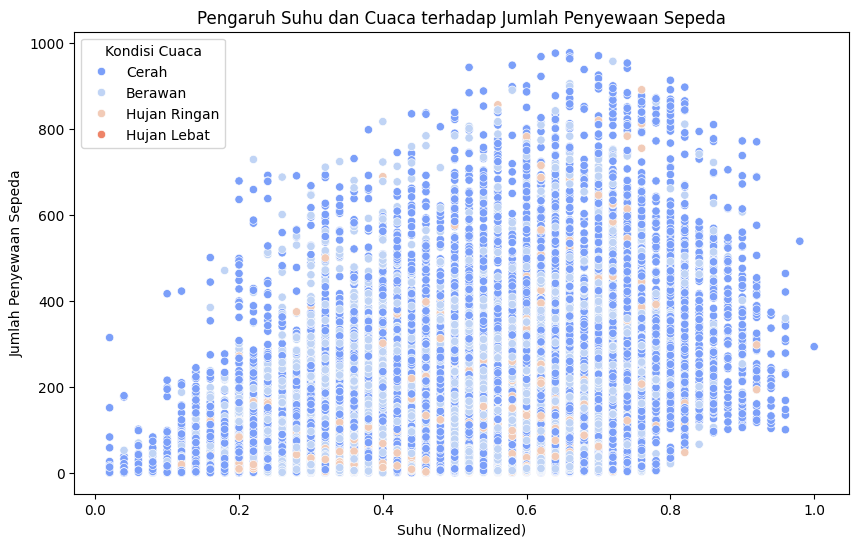

In [92]:
# Membuat scatter plot untuk melihat pengaruh suhu terhadap jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_df, hue='weathersit_condition', palette='coolwarm')
plt.title("Pengaruh Suhu dan Cuaca terhadap Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.legend(title="Kondisi Cuaca", loc='upper left')
plt.show()

**Insight:**
- Sebagian besar penyewaan terjadi pada suhu yang nyaman (tidak terllau panas dan tidak terlalu dingin) dan kondisi cuaca cerah atau berawan. 
- Kombinasi suhu rendah dan hujan lebat adalah yang paling tidak mendukung aktivitas penyewaan. 

### Pertanyaan 3: Bagaimana pola penyewaan pengguna terdaftar dan pengguna kasual berbeda pada hari kerja, akhir pekan dan hari libur?

In [94]:
# Mengkategorikan tipe hari berdasarkan weekday dan holiday
def categorize_day(row):
    if row['holiday'] == 1:
        return 'Holiday'
    elif row['weekday'] in [6, 0]:  # 6 = Sabtu, 0 = Minggu
        return 'Weekend'
    else:
        return 'Weekday'

day_df['day_type'] = day_df.apply(categorize_day, axis=1)

In [97]:
# Menambahkan kolom 'user_type' berdasarkan kondisi casual dan registered
day_df['user_type'] = day_df.apply(lambda row: 'Casual' if row['casual'] > row['registered'] else 'Registered', axis=1)

C:\Users\H P\AppData\Local\Temp\ipykernel_35992\394603774.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day_type', y='cnt', hue='user_type', data=day_df, ci=None)


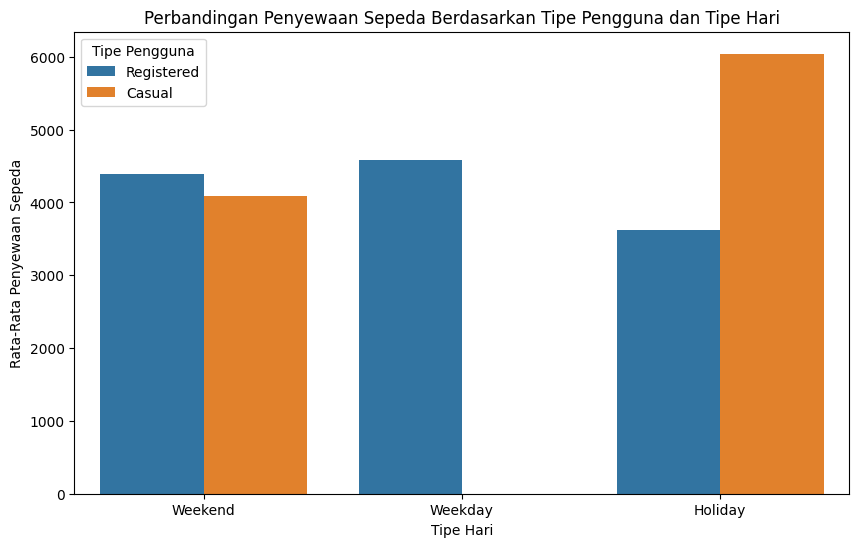

In [108]:
# Membuat bar plot untuk membandingkan jumlah penyewaan per tipe pengguna
plt.figure(figsize=(10, 6))
#plt.bar(x=day_df['day_type'], height=day_df['cnt'], color=['blue','orange'])
sns.barplot(x='day_type', y='cnt', hue='user_type', data=day_df, ci=None)
plt.title('Perbandingan Penyewaan Sepeda Berdasarkan Tipe Pengguna dan Tipe Hari')
plt.ylabel('Rata-Rata Penyewaan Sepeda')
plt.xlabel('Tipe Hari')
plt.legend(title='Tipe Pengguna', loc='upper left')
plt.show()

**Insight :**
- Pengguna registered menyewa sepeda sedikit lebih banyak dibanding pengguna casual saat weekend. Menunjukan bahwa pengguna terdaftar cendrung tetap menggunakan sepeda meskipun hari libur. 
- Pengguna registered jauh lebih dominan dibandingkan pengguna casual saat weekday. Menunjukkan kemungkinan besar terkait penggunaan sepeda oleh pengguna registered untuk perjalan rutin ke kantor atau ke sekolah. 
- Pengguna casual secara signifikan lebih banyak dibandingkan pengguna registered. Menunjukkan bahwa pada hari libur, penyewaan sepeda lebih di dorong oleh kegiatan rekreasi yang umumnya dilakukan oleh pengguna casual.

### Pertanyaan ke-4 : Faktor apa saja yang paling berpengaruh terhadap jumlah penyewaan sepeda?

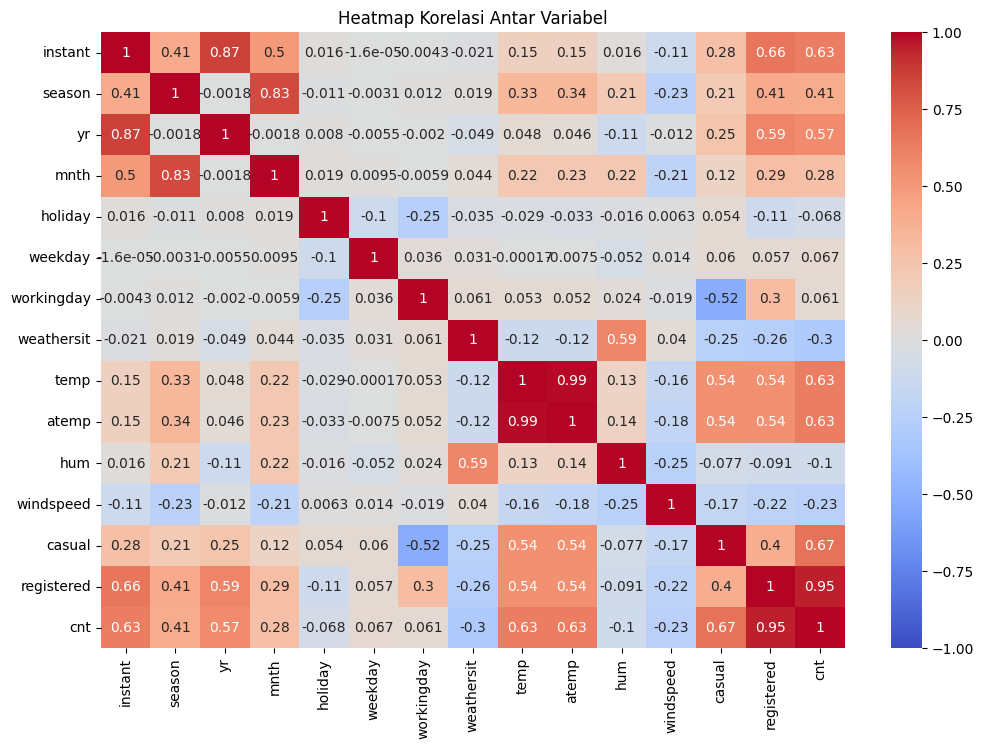

In [113]:
# Buat heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

**Insight :**
- Faktor registered, atemp (suhu terasa) dan temp (suhu) memiliki dampak paling besar terhadap jumlah penyewaan sepeda. 
- Variabel seperti season, month, holiday, weekday, dan working day memiliki dampak kecil atau hampir tidak signifikan tapi perlu di pertimbangkan untuk mendapatkan gambaran lebih lengkap.

### Pertanyaan ke-5 : Bagaimana pola perilaku pengguna sepeda (casual vs registered) berdasarkan waktu penyewaan, intensitas penggunaan, dan kontribusi total?

In [61]:
# Tambahkan kolom kategori pengguna
rfm_registered['user_type'] = 'registered'
rfm_casual['user_type'] = 'casual'

In [121]:
# Gabungkan data
rfm_combined = pd.concat([rfm_registered, rfm_casual])
rfm_combined.head()

,registered,dteday,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score,user_segment,user_type,casual
0,0.0,2012-11-23,38,24,35,5,5,2,12,Medium-Value Users,registered,NaN
1,1.0,2012-12-31,0,201,294,5,5,2,12,Medium-Value Users,registered,NaN
2,2.0,2012-12-30,1,245,648,5,5,2,12,Medium-Value Users,registered,NaN
3,3.0,2012-12-31,0,294,1154,5,5,2,12,Medium-Value Users,registered,NaN
4,4.0,2012-12-28,3,307,1602,5,5,3,13,High-Value Users,registered,NaN


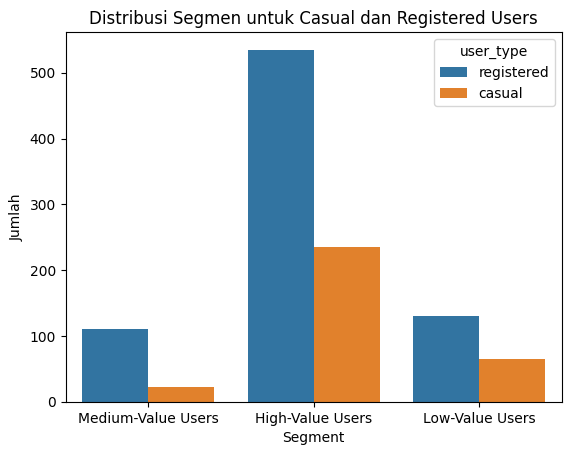

In [125]:
# Visualisasi distribusi segmen berdasarkan jenis pengguna
sns.countplot(data=rfm_combined, x='user_segment', hue='user_type')
plt.title('Distribusi Segmen untuk Casual dan Registered Users')
plt.xlabel('Segment')
plt.ylabel('Jumlah')
plt.show()

**Insight :**
- Sebagian besar pengguna tergolong dalam kategori high-value user, terutama pada kelompok pengguna registered. Ini mengindikasikan bahwa pengguna terdaftar cendrung lebih sering menyewa speda dengan durasi yang lebih lama dibandingkan dengan pengguna casual. 
- Kelompok registered masih mendominasi segmen medium-value use. Segmen ini menunjukkan pengguna menyewa sepeda secara teratur tetapi tidak seintensif High-value user. 
- Pada segmen low value user menunjukkan pengguna registered dan casual hanya sesekali menyewa sepeda atau untuk keperlan spesifik.

## Conclusion

1. Jam berapa saja penggunaan sepeda paling tinggi di setiap musim dan kondisi cuaca?
    - Jam 17:00 adalah puncak penyewaan sepeda di semua musim dan kondisi cuaca cerah maupun mendung. Secara keseluruhan penyewaan sepeda tinggi terjadi pada pagi hari (07:00 - 09:00) dan sore hari (16:00 - 18:00). Ini mencerminkan pola commuting (pengguna sepeda untuk perjalanan kerja atau sekolah)
    - Musim gugur memiliki rata-rata jumlah penyewaan tertinggi, terutama pada jam-jam sibuk (07:00 - 09:00 dan 16:00 - 18:00).
    - Cuaca buruk (hujan ringan maupun salju) menurunkan jumlah penyewaan disemua musim, terutama di musim dingin. 

2. Bagaimana pengaruh cuaca dan suhu terhadap jumlah penyewaan sepeda?
    - Sebagian besar penyewaan terjadi pada suhu yang nyaman (tidak terllau panas dan tidak terlalu dingin) dan kondisi cuaca cerah atau berawan. 
    - Kombinasi suhu rendah dan hujan lebat adalah yang paling tidak mendukung aktivitas penyewaan. 

3. Bagaimana pola penyewaan pengguna terdaftar dan pengguna kasual berbeda pada hari kerja, akhir pekan dan hari libur?
    - Pengguna registered menyewa sepeda sedikit lebih banyak dibanding pengguna casual saat weekend. Menunjukan bahwa pengguna terdaftar cendrung tetap menggunakan sepeda meskipun hari libur. 
    - Pengguna registered jauh lebih dominan dibandingkan pengguna casual saat weekday. Menunjukkan kemungkinan besar terkait penggunaan sepeda oleh pengguna registered untuk perjalan rutin ke kantor atau ke sekolah. 
    - Pengguna casual secara signifikan lebih banyak dibandingkan pengguna registered. Menunjukkan bahwa pada hari libur, penyewaan sepeda lebih di dorong oleh kegiatan rekreasi yang umumnya dilakukan oleh pengguna casual.

4. Faktor apa saja yang paling berpengaruh terhadap jumlah penyewaan sepeda?
    - Faktor registered, atemp (suhu terasa) dan temp (suhu) memiliki dampak paling besar terhadap jumlah penyewaan sepeda. 
    - Variabel seperti season, month, holiday, weekday, dan working day memiliki dampak kecil atau hampir tidak signifikan tapi perlu di pertimbangkan untuk mendapatkan gambaran lebih lengkap.

5. Bagaimana pola perilaku pengguna sepeda (casual vs registered) berdasarkan waktu penyewaan, intensitas penggunaan, dan kontribusi total?
    - Sebagian besar pengguna tergolong dalam kategori high-value user, terutama pada kelompok pengguna registered. Ini mengindikasikan bahwa pengguna terdaftar cendrung lebih sering menyewa speda dengan durasi yang lebih lama dibandingkan dengan pengguna casual. 
    - Kelompok registered masih mendominasi segmen medium-value use. Segmen ini menunjukkan pengguna menyewa sepeda secara teratur tetapi tidak seintensif High-value user. 
    - Pada segmen low value user menunjukkan pengguna registered dan casual hanya sesekali menyewa sepeda atau untuk keperlan spesifik.
